# Telecom Churn case study using PCA and Ensemble

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Goal
It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"
Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
import xgboost as xgb 

from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# to ignore the warnings
warnings.filterwarnings('ignore')

## Step 1. Reading, Understanding and Visualizing the data

In [2]:
# train dataset
telecom_train_df = pd.read_csv('train (1).csv')
# test dataset
telecom_test_df = pd.read_csv('test (1).csv')
# test solution dataset
telecom_test_sol_df = pd.read_csv('solution (1).csv')

In [3]:
telecom_train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
telecom_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
telecom_test_sol_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [6]:
telecom_train_df.shape

(69999, 172)

In [7]:
telecom_test_df.shape

(30000, 171)

In [8]:
telecom_train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [9]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [10]:
telecom_train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [11]:
telecom_train_df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [12]:
telecom_train_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [13]:
# Columns which we have to impute as Zero as thy should not be dropped based on missing values becuase they are important.
rech_cols_to_impute = [x for x in telecom_train_df.columns if 'rech' in x and 
                       'count' not in x and 'date' not in x and 'num' not in x]
telecom_train_df[rech_cols_to_impute] = telecom_train_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))
telecom_test_df[rech_cols_to_impute] = telecom_test_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))


### Dropping rows for both train and test datasets
 - Rows which are empty

In [14]:
telecom_train_df.dropna(axis=0, how='all', inplace=True)
telecom_test_df.dropna(axis=0, how='all', inplace=True)

In [15]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 172)
(30000, 171)


### Dropping columns for both train and test datasets

    - Not needed columns like Id, last_date_of_month_6 etc.
    - Columns having more than 70% values as null

In [16]:
# For us dates doesn't matter as long as customer is doing a recharge.
cols_to_delete = ['id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                  'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                  'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
                 ]
telecom_train_df.drop(cols_to_delete, axis=1, inplace=True)
telecom_test_df.drop(cols_to_delete, axis=1, inplace=True)

In [17]:
# to check the % of null values
round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()

arpu_3g_8           0.74
night_pck_user_8    0.74
night_pck_user_7    0.74
arpu_2g_8           0.74
arpu_2g_7           0.74
fb_user_7           0.74
arpu_3g_7           0.74
fb_user_8           0.74
count_rech_3g_8     0.74
count_rech_3g_7     0.74
count_rech_2g_8     0.74
count_rech_2g_7     0.74
arpu_2g_6           0.75
count_rech_3g_6     0.75
night_pck_user_6    0.75
fb_user_6           0.75
arpu_3g_6           0.75
count_rech_2g_6     0.75
dtype: float64

In [18]:
# count of missing data > 70% columns in train dataset
len(round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values())

18

In [19]:
# count of missing data > 70% columns in test dataset
len(round((pd.isnull(telecom_test_df).sum()/len(telecom_test_df.index)),2)[pd.isnull(telecom_test_df).sum()/ len(telecom_test_df.index) > 0.70].sort_values())

18

### As we have more than 70% data as null for 18 columns in train and test, we are dropping these columns from dataset.

In [20]:
cols_to_delete = ((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index))[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()).keys()

In [21]:
cols_to_delete = cols_to_delete.to_list()
print(cols_to_delete)

['arpu_3g_8', 'night_pck_user_8', 'arpu_2g_8', 'count_rech_3g_8', 'fb_user_8', 'count_rech_2g_8', 'arpu_3g_7', 'fb_user_7', 'arpu_2g_7', 'night_pck_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_2g_6']


In [22]:
telecom_train_df = telecom_train_df.drop(cols_to_delete, axis=1)

In [23]:
telecom_train_df.shape

(69999, 144)

In [24]:
telecom_test_df = telecom_test_df.drop(cols_to_delete, axis=1)

In [25]:
telecom_test_df.shape

(30000, 143)

## Lets check the data types of columns now

In [26]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 144 entries, circle_id to churn_probability
dtypes: float64(117), int64(27)
memory usage: 77.4 MB


In [27]:
telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Columns: 143 entries, circle_id to jun_vbc_3g
dtypes: float64(117), int64(26)
memory usage: 33.0 MB


### We can see now we don't have any categorical data, all are numerical data only.

### Imputing the na values with
 - Median for numerical variables
 - Mode for categorical variables - Not needed in out this case.

In [28]:
# A generic method to impute na
def replace_na(df, columns, data_type):
    for col in columns:
        if data_type == 'categorical':
            value = pd.to_datetime(df[col]).mode()
        else:
            value = df[col].median()
        df[col].fillna(value, inplace=True)
    return df

In [29]:
telecom_train_df = replace_na(telecom_train_df, telecom_train_df.columns, 'numerical')
telecom_test_df = replace_na(telecom_test_df, telecom_test_df.columns, 'numerical')

### Lets check for unique entries in train and test dataset

In [30]:
def cols_to_delete_unique(df, df_columns, threshold=4):
    # threshold=4 means column has only 1 unique value
    # eg. telecom_train_df['circle_id'].describe().unique() --> array([30000.,   109.,     0.])
    # Here because there are all 109 in column, we have only 3 entries in array.
    cols_to_delete = []
    for column in df_columns:
        if len(df[column].describe().unique()) < threshold:
            cols_to_delete.append(column)
    
    return cols_to_delete

In [31]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 144)
(30000, 143)


In [32]:
# on train data
telecom_train_df = telecom_train_df.drop(cols_to_delete_unique(telecom_train_df, telecom_train_df.columns), axis=1)
print(telecom_train_df.shape)

# on test data
telecom_test_df = telecom_test_df.drop(cols_to_delete_unique(telecom_test_df, telecom_test_df.columns), axis=1)
print(telecom_test_df.shape)

(69999, 134)
(30000, 133)


### Lets find the high value customers based on recharge done in 6th and 7th month and update dataframe

### For train data

In [33]:
# total data recharge in 6th, 7th and 8th months
telecom_train_df["total_data_recharge_amnt_6"] = telecom_train_df.total_rech_data_6 * telecom_train_df.av_rech_amt_data_6
telecom_train_df["total_data_recharge_amnt_7"] = telecom_train_df.total_rech_data_7 * telecom_train_df.av_rech_amt_data_7
telecom_train_df["total_data_recharge_amnt_8"] = telecom_train_df.total_rech_data_8 * telecom_train_df.av_rech_amt_data_8

# total amount spent on recharge in 6th, 7th and 8th months
telecom_train_df["total_recharge_amnt_6"] = telecom_train_df.total_rech_amt_6 + telecom_train_df.total_data_recharge_amnt_6
telecom_train_df["total_recharge_amnt_7"] = telecom_train_df.total_rech_amt_7 + telecom_train_df.total_data_recharge_amnt_7
telecom_train_df["total_recharge_amnt_8"] = telecom_train_df.total_rech_amt_8 + telecom_train_df.total_data_recharge_amnt_8

# average recharge for 6th and 7th month
telecom_train_df['average_amnt_6_7'] = (telecom_train_df["total_recharge_amnt_6"] + telecom_train_df["total_recharge_amnt_7"])/2

# 70th percentile of average_amnt_6_7
telecom_train_df['average_amnt_6_7'].quantile(.70)

477.5

## Filter dataset based on average_amnt_6_7 (70th percentile for train dataset is 477.5)

In [34]:
telecom_train_df = telecom_train_df[telecom_train_df["average_amnt_6_7"]>= telecom_train_df["average_amnt_6_7"].quantile(.70)]

In [35]:
telecom_train_df.shape

(21013, 141)

In [36]:
# Lets remove not needed newly added features
telecom_train_df.drop(['total_data_recharge_amnt_6', 'total_data_recharge_amnt_7', 'total_data_recharge_amnt_8',
                        'total_recharge_amnt_6', 'total_recharge_amnt_7', 'total_recharge_amnt_8',
                        'average_amnt_6_7'], 
                      axis=1, inplace=True)

## Lets focus on Outliers now and treat them

In [37]:
# Generic method to remove outliers
def remove_outliers(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.99)
        iqr = q3-q1
        lower_value  = q1 - (1.5 * iqr)
        higer_value = q3 + (1.5 * iqr)
        df = df[(df[feature] <= higer_value) & (df[feature] >= lower_value)]
    return df

In [38]:
telecom_train_df_wo_outlier = remove_outliers(telecom_train_df, telecom_train_df.columns)
telecom_test_df_wo_outlier = remove_outliers(telecom_test_df, telecom_test_df.columns)

In [39]:
telecom_train_df.shape

(21013, 134)

In [40]:
telecom_test_df.shape

(30000, 133)

In [41]:
telecom_train_df_wo_outlier.shape

(18805, 134)

In [42]:
telecom_test_df_wo_outlier.shape

(26190, 133)

### Even though there are outliers but in this assignmnet we are looking for higest paying customers only.
### So better we decided not to remove outliers.

## Let's check for Data imbalance here

In [43]:
churn_data_rows = telecom_train_df['churn_probability'].sum()

In [44]:
churn_data_rows/len(telecom_train_df) * 100

8.275829248560415

### We can see that there is a data imbalance. We have only about 8.28% of data as Churn and 91.72% as not churn.
### So we need to apply data imbalance technique. We will use SMOTE.

## Dividing the data from telecom_train_df to train the model

In [45]:
y = telecom_train_df['churn_probability']
X = telecom_train_df.drop(['churn_probability'], axis=1)

telecom_train_df.drop('churn_probability', axis=1, inplace=True)

In [46]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Taking a backup of variables

In [47]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

## Rescaling of the variables

- We will use Min-Max scaling (Normalization) --> compresses all the data between 0 and 1

In [48]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()
# fit on data
# removed churn_probability becuase test data is not having it.
# Also churn_probability is having 0 and 1 only. So it need not be scaled.
train_numerical_columns = telecom_train_df.columns.to_list()
X_train[train_numerical_columns] = scaler.fit_transform(X_train[train_numerical_columns])
X_train.head()
# So all numberic values are now between 0 and 1

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
6968,0.127277,0.274576,0.081830,0.004624,0.004018,0.002985,0.011537,0.040985,0.006554,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.337600,0.000000,0.002051,0.000000
42203,0.156166,0.094305,0.083632,0.066057,0.041462,0.074009,0.065428,0.053213,0.049054,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.009660,0.000000,0.000000,0.000000
18406,0.151447,0.122733,0.087708,0.015153,0.016084,0.008306,0.056327,0.259820,0.136117,0.005055,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.702487,0.000000,0.000000,0.000000
21455,0.171177,0.128305,0.077781,0.009636,0.010909,0.006579,0.081607,0.121132,0.038009,0.005166,...,0.0,0.0,0.0,0.000000,0.030303,0.02439,0.542381,0.029661,0.043865,0.039021
66143,0.138174,0.087866,0.074838,0.000000,0.006171,0.001633,0.000000,0.033354,0.020053,0.000000,...,0.0,0.0,0.0,0.034483,0.000000,0.00000,0.055301,0.098218,0.000000,0.000000


In [49]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [50]:
X_resampled.shape

(27020, 133)

In [51]:
sum(y_resampled)/len(y_resampled) * 100

50.0

In [52]:
telecom_test_df.shape

(30000, 133)

## Now there is no data imbalance.

In [53]:
# Lets fit the scaler for train data as well
test_numerical_columns = telecom_test_df.columns.to_list()
telecom_test_df[test_numerical_columns] = scaler.transform(telecom_test_df[test_numerical_columns])
telecom_test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.132455,0.074824,0.049909,0.004308,0.002480,0.002149,0.007194,0.004771,0.002487,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.365129,0.000000,0.000000,0.0000
1,0.150615,0.099685,0.064554,0.010236,0.005052,0.001845,0.056723,0.092260,0.028195,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.568220,0.000000,0.000000,0.0000
2,0.145864,0.095230,0.083592,0.001022,0.000963,0.000781,0.002031,0.006797,0.003215,0.008728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023424,0.040694,0.082745,0.0319
3,0.129731,0.080680,0.047931,0.000720,0.000265,0.000000,0.004788,0.030417,0.001714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.256943,0.000000,0.000000,0.0000
4,0.144568,0.093651,0.067145,0.061129,0.074656,0.065164,0.007287,0.003537,0.005294,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.068099,0.000000,0.000000,0.0000


## Modelling 

We will do modelling using below model.

1. Logistic Regression using RFE - To get important predictors for Churn probability
2. Logistic Regression - To know Churn probability + PCA
3. Ridge Model
4. Lasso Model
5. Tree models - Random Forest
6. Tree models - XGBoost

## 1. Logistic Regression using RFE - To get important predictors for Churn probability

In [54]:
# For RFE
logml = sm.GLM(y_resampled, (sm.add_constant(X_resampled)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26889
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8658.8
Date:                Sun, 18 Sep 2022   Deviance:                       17318.
Time:                        19:47:19   Pearson chi2:                 1.04e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9124      0.691     -5.664      0.000      -5.266      -2.558
arpu_6                 9.2332      3.771      2.448      0.014       1.842      16.625
arpu_7                19.2173      4.427      4.341      0.000      10.541      27.893
arpu_8                42.8007      5.081      8.423      0.000      32.841      52.760
onnet_mou_6          -48.3625     36.177     -1.337      0.181    -119.269      22.544
onnet_mou_7          -28.6282     31.379     -0.912      0.362     -90.130      32.874
onnet_mou_8          -26.8302     45.383     -0.591      0.554    -115.779      62.119
offnet_mou_6         -41.9867     40.681     -1.032      0.302    -121.719      37.746
offnet_mou_7         -32.2045     25.060     -1.285      0.199     -81.322      16.913
offnet_mou_8         -76.3922     57.559     -1.327      0.184    -189.205      36.421
roam_ic_mou_6          1.6146      1.136      1.422      0.155      -0.612       3.841
roam_ic_mou_7          1.5134      1.335      1.133      0.257      -1.104       4.131
roam_ic_mou_8         -2.9353      1.490     -1.970      0.049      -5.856      -0.015
roam_og_mou_6         22.4030     18.506      1.211      0.226     -13.868      58.674
roam_og_mou_7         15.9387     10.583      1.506      0.132      -4.804      36.682
roam_og_mou_8         28.4536     22.233      1.280      0.201     -15.122      72.029
loc_og_t2t_mou_6   -3.977e+04   2.52e+04     -1.579      0.114   -8.91e+04    9581.943
loc_og_t2t_mou_7    -2.41e+04   2.86e+04     -0.844      0.399   -8.01e+04    3.19e+04
loc_og_t2t_mou_8    2.115e+05   4.42e+04      4.791      0.000    1.25e+05    2.98e+05
loc_og_t2m_mou_6   -2.905e+04   1.84e+04     -1.580      0.114   -6.51e+04    6988.553
loc_og_t2m_mou_7   -1.484e+04   1.76e+04     -0.844      0.399   -4.93e+04    1.96e+04
loc_og_t2m_mou_8    9.763e+04   2.04e+04      4.792      0.000    5.77e+04    1.38e+05
loc_og_t2f_mou_6   -3824.5614   2418.151     -1.582      0.114   -8564.050     914.927
loc_og_t2f_mou_7   -2653.9529   3147.147     -0.843      0.399   -8822.247    3514.341
loc_og_t2f_mou_8    1.158e+04   2415.969      4.793      0.000    6844.343    1.63e+04
loc_og_t2c_mou_6      -8.7731      1.528     -5.743      0.000     -11.767      -5.779
loc_og_t2c_mou_7      -2.6621      2.625     -1.014      0.311      -7.808       2.484
loc_og_t2c_mou_8       6.2039      1.584      3.915      0.000       3.098       9.309
loc_og_mou_6        2.793e+04   4.74e+04      0.589      0.556    -6.5e+04    1.21e+05
loc_og_mou_7       -9910.9888   3.49e+04     -0.284      0.777   -7.84e+04    5.86e+04
loc_og_mou_8       -2.535e+05   5.38e+04     -4.712      0.000   -3.59e+05   -1.48e+05
std_og_t2t_mou_6   -1.248e+05    3.5e+04     -3.570      0.000   -1.93e+05   -5.63e+04
std_og_t2t_mou_7   -8.263e+04   3.98e+

## Lower the p-value higher the significance

In [55]:
logreg = LogisticRegression()

In [56]:
# Running rfe with 70 variables as output
rfe = RFE(logreg, n_features_to_select=70)
rfe = rfe.fit(X_resampled, y_resampled)

In [57]:
rfe.support_ # it givs whether or not the selected feature was in top 70. True means yes

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False,

In [58]:
# to see the selected columns
list(zip(X_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 16),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 40),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', False, 47),
 ('roam_ic_mou_8', False, 46),
 ('roam_og_mou_6', False, 6),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 58),
 ('loc_og_t2t_mou_7', False, 37),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 13),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 9),
 ('loc_og_t2f_mou_7', False, 59),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', True, 1),
 ('loc_og_t2c_mou_8', False, 18),
 ('loc_og_mou_6', False, 55),
 ('loc_og_mou_7', False, 28),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 43),
 ('st

In [59]:
col = X_resampled.columns[rfe.support_]

In [60]:
X_resampled_sm = sm.add_constant(X_resampled[col])
logm2 = sm.GLM(y_resampled, X_resampled_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26950
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8895.1
Date:                Sun, 18 Sep 2022   Deviance:                       17790.
Time:                        19:47:39   Pearson chi2:                 1.56e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2411      0.525     -4.268      0.000      -3.270      -1.212
arpu_6                 5.2194      3.386      1.542      0.123      -1.417      11.855
arpu_7                 7.5787      2.432      3.116      0.002       2.811      12.346
arpu_8                36.4583      4.542      8.028      0.000      27.557      45.360
onnet_mou_7           -6.6635     10.123     -0.658      0.510     -26.503      13.176
offnet_mou_6           1.5466      0.701      2.207      0.027       0.173       2.920
offnet_mou_7         -11.7517      8.289     -1.418      0.156     -27.997       4.494
offnet_mou_8         -40.3550     10.354     -3.898      0.000     -60.648     -20.062
roam_ic_mou_6          1.9701      0.848      2.323      0.020       0.308       3.633
roam_og_mou_7          8.5338      3.555      2.400      0.016       1.566      15.502
roam_og_mou_8         15.4020      3.054      5.043      0.000       9.416      21.388
loc_og_t2t_mou_8     1.79e+04   3.83e+04      0.467      0.641   -5.73e+04    9.31e+04
loc_og_t2m_mou_6      -2.0136      0.913     -2.207      0.027      -3.802      -0.225
loc_og_t2m_mou_8    8278.7427   1.77e+04      0.468      0.640   -2.64e+04     4.3e+04
loc_og_t2f_mou_8     982.5764   2098.084      0.468      0.640   -3129.592    5094.745
loc_og_t2c_mou_6      -6.7205      1.289     -5.214      0.000      -9.247      -4.194
loc_og_t2c_mou_7      -1.5980      2.061     -0.775      0.438      -5.638       2.442
loc_og_mou_8       -1.837e+04   3.94e+04     -0.467      0.641   -9.55e+04    5.88e+04
std_og_t2t_mou_6       2.1886      0.576      3.801      0.000       1.060       3.317
std_og_t2t_mou_7     -15.6511     31.003     -0.505      0.614     -76.415      45.113
std_og_t2m_mou_7      -5.5303     25.133     -0.220      0.826     -54.791      43.730
std_og_t2m_mou_8      34.5127     10.488      3.291      0.001      13.957      55.069
std_og_t2f_mou_8      -6.0781      2.336     -2.602      0.009     -10.656      -1.500
std_og_mou_7          11.8329     31.038      0.381      0.703     -49.001      72.667
std_og_mou_8          35.1469     31.576      1.113      0.266     -26.741      97.035
spl_og_mou_8           1.2120      2.091      0.580      0.562      -2.886       5.310
total_og_mou_7        13.8754     10.182      1.363      0.173      -6.081      33.832
total_og_mou_8       -43.9535     31.888     -1.378      0.168    -106.453      18.546
loc_ic_t2t_mou_8     747.4810   8948.754      0.084      0.933   -1.68e+04    1.83e+04
loc_ic_t2m_mou_6       2.7473      1.864      1.474      0.140      -0.906       6.400
loc_ic_t2m_mou_8     878.0102   1.05e+04      0.084      0.933   -1.96e+04    2.14e+04
loc_ic_t2f_mou_8     268.7874   3288.744      0.082      0.935   -6177.033    6714.608
loc_ic_mou_6           2.7067      2.4

## Getting the top 15 features for Logistic model with RFE.

In [61]:
top_feature_lg_rfe = res.params.sort_values(ascending=False).head(25)

In [62]:
top_feature_lg_rfe = list(top_feature_lg_rfe.keys())

In [63]:
top_feature_lg_rfe

['std_ic_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'arpu_8',
 'std_og_mou_8',
 'std_og_t2m_mou_8',
 'roam_og_mou_8',
 'loc_ic_mou_7',
 'total_og_mou_7',
 'std_og_mou_7',
 'max_rech_amt_8',
 'roam_og_mou_7',
 'arpu_7',
 'max_rech_data_6',
 'arpu_6',
 'total_ic_mou_8',
 'std_ic_t2t_mou_6',
 'total_rech_num_7',
 'total_rech_data_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_mou_6']

### Making predictions on the test set

In [64]:
X_test = X_test[col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 5662 to 36425
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              6304 non-null   float64
 1   arpu_7              6304 non-null   float64
 2   arpu_8              6304 non-null   float64
 3   onnet_mou_7         6304 non-null   float64
 4   offnet_mou_6        6304 non-null   float64
 5   offnet_mou_7        6304 non-null   float64
 6   offnet_mou_8        6304 non-null   float64
 7   roam_ic_mou_6       6304 non-null   float64
 8   roam_og_mou_7       6304 non-null   float64
 9   roam_og_mou_8       6304 non-null   float64
 10  loc_og_t2t_mou_8    6304 non-null   float64
 11  loc_og_t2m_mou_6    6304 non-null   float64
 12  loc_og_t2m_mou_8    6304 non-null   float64
 13  loc_og_t2f_mou_8    6304 non-null   float64
 14  loc_og_t2c_mou_6    6304 non-null   float64
 15  loc_og_t2c_mou_7    6304 non-null   float64
 16  lo

In [65]:
X_test_sm = sm.add_constant(X_test)

In [66]:
y_test_pred = res.predict(X_test_sm)

In [67]:
y_test_pred[:10]

5662     0.0
37574    1.0
58341    0.0
23282    0.0
30561    1.0
45844    0.0
30159    0.0
62778    0.0
45559    0.0
35274    0.0
dtype: float64

In [68]:
X_test_sm.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_og_mou_7,...,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g
5662,1.0,554.740,782.352,673.692,38.63,649.01,845.83,661.89,0.0,0.00,...,0.0,0.0,0.0,0,0,0,0,0,1360,0.00
37574,1.0,1563.157,1579.675,1256.565,3158.18,1358.03,1144.44,1327.03,0.0,0.00,...,0.0,0.0,0.0,0,0,0,0,0,834,0.00
58341,1.0,594.217,796.737,996.393,1200.53,149.53,186.48,585.36,0.0,0.00,...,0.0,0.0,0.0,0,0,0,0,0,594,0.00
23282,1.0,352.160,197.245,365.564,179.88,508.53,116.58,507.64,0.0,34.96,...,69.0,0.0,0.0,0,0,3,0,0,1164,0.00
30561,1.0,332.040,275.976,267.033,96.89,152.34,178.24,424.68,0.0,0.00,...,0.0,0.0,0.0,0,0,0,0,0,635,31.05


In [69]:
X_resampled_sm.shape

(27020, 71)

In [70]:
y_pred_train = res.predict(X_resampled_sm)

In [71]:
y_pred_train.head()

0    0.998521
1    0.084339
2    0.103102
3    0.046302
4    0.006346
dtype: float64

In [72]:
y_pred_train.shape

(27020,)

## Confusion matrix for Precision and Recall and Accuracy of the model

In [73]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
27015    1
27016    1
27017    1
27018    1
27019    1
Name: churn_probability, Length: 27020, dtype: int64

In [74]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_train})

In [75]:
y_pred_train_final.head()

,Churn_Prob
0,0.998521
1,0.084339
2,0.103102
3,0.046302
4,0.006346


In [76]:
y_pred_train_final['Churn_Prob_2'] =  y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [77]:
confusion = metrics.confusion_matrix(y_resampled, y_pred_train_final.Churn_Prob_2)
confusion

array([[11758,  1752],
       [ 1599, 11911]])

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return auc_score

In [79]:
# metrics_dict holds different metrics for all models on test data so that we can compare them at one place. 
metrics_dict = {}

In [80]:
def get_accuracy_params(y_actual, y_pred, y_proba, model):
    # Print ROC curve
    auc_score = draw_roc(y_actual, y_proba)
    confusion = metrics.confusion_matrix(y_actual, y_pred)
    print('confusion matrix: ')
    print(confusion)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    print('Accuracy: ', accuracy)
    precision = TP / (TP+FP)
    print('Precision: ', precision)
    recall = TP / (TP+FN)
    print('Recall: ', recall)
    f1_score = 2*precision*recall/(precision+recall)
    print('F1_score: ', f1_score)
    print('AUC score: ', auc_score)
    if 'train' not in model:
        metrics_dict[model] = {
                           'Accuracy': accuracy, 
                           'Precision':precision, 
                           'Recall': recall, 
                           'F1 Score': f1_score, 
                          }
    return metrics_dict

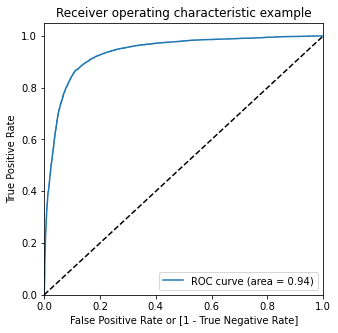

confusion matrix: 
[[11758  1752]
 [ 1599 11911]]
Accuracy:  0.875980754996299
Precision:  0.8717704750054893
Recall:  0.8816432272390822
F1_score:  0.8766790564162956
AUC score:  0.9367527850357301


{}

In [81]:
get_accuracy_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_rfe_train')

### Let's check for test data set

In [82]:
telecom_test_df.shape

(30000, 133)

In [83]:
telecom_test_sol_df.shape

(30000, 2)

In [84]:
# Lets do prediction on telecom_test_df dataset

In [85]:
telecom_test_df_ori = telecom_test_df

In [86]:
telecom_test_df = telecom_test_df[col]
telecom_test_df = sm.add_constant(telecom_test_df)

In [87]:
y_pred_test = res.predict(telecom_test_df)

In [88]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_test})

In [89]:
y_pred_test_final.head()

,Churn_Prob
0,0.107372
1,0.258495
2,0.774778
3,0.121758
4,0.275396


In [90]:
y_pred_test_final['Churn_Prob_2'] =  y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Saving the y_pred_test_final['Churn_Prob_2'] for Kaggle submission.
### This will be updated if we find better model than Logistic + RFE for current dataset.

In [91]:
y_pred_test_final['Churn_Prob_2'].to_csv('Kaggle_solution.csv')

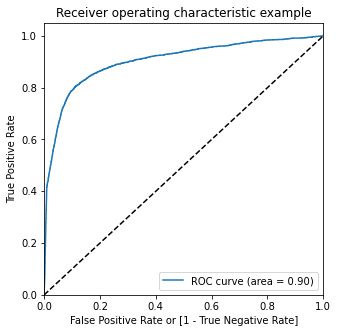

confusion matrix: 
[[21722  5219]
 [  423  2636]]
Accuracy:  0.8119333333333333
Precision:  0.335582431572247
Recall:  0.8617195161817588
F1_score:  0.4830492944841488
AUC score:  0.9040288527037985


In [92]:
metrics_dict = get_accuracy_params(telecom_test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_rfe_test')

In [93]:
metrics_dict

{'Logistic_rfe_test': {'Accuracy': 0.8119333333333333,
  'Precision': 0.335582431572247,
  'Recall': 0.8617195161817588,
  'F1 Score': 0.4830492944841488}}

### This seems a good model but lets compare with other models.

## Model 2: Logistic Regression - To know Churn probability + PCA

PCA and Logistic Regression to check if model improves or not.

## PCA on the data

- While computing the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data.

In [94]:
# Looking at the data again

In [95]:
y_resampled.shape

(27020,)

In [96]:
X_resampled.shape

(27020, 133)

In [97]:
pca = PCA(random_state=42)

In [98]:
pca.fit(X_resampled)

PCA(random_state=42)

In [99]:
pca.components_

array([[ 1.82524787e-02,  1.41652959e-02, -5.68082240e-03, ...,
        -2.40309980e-02, -3.96477813e-02, -4.51932644e-02],
       [ 4.89833499e-02,  5.49580709e-02,  3.78624239e-02, ...,
        -1.84102663e-02, -3.65208610e-02, -5.26182866e-02],
       [ 4.85228830e-02,  7.30524691e-02,  6.73488795e-02, ...,
         8.32115408e-02,  1.32599653e-01,  1.46337226e-01],
       ...,
       [-4.35765955e-16, -4.00655889e-17,  3.00269973e-16, ...,
        -6.49483910e-18, -6.88378020e-17,  1.10150881e-17],
       [ 0.00000000e+00,  5.79064397e-16, -3.39441967e-16, ...,
        -1.88710356e-17, -6.38601213e-17,  3.41876911e-17],
       [ 0.00000000e+00,  4.60936334e-17, -1.61579593e-16, ...,
         2.53203984e-17,  1.37793994e-17, -2.80750789e-17]])

In [100]:
pca.explained_variance_ratio_

array([1.93142347e-01, 1.58068129e-01, 7.46788537e-02, 6.12549325e-02,
       5.33340121e-02, 4.92266704e-02, 4.52862352e-02, 3.24389528e-02,
       2.09515698e-02, 1.98494785e-02, 1.94535881e-02, 1.79592882e-02,
       1.54670558e-02, 1.26572149e-02, 1.21890778e-02, 1.18389029e-02,
       1.08819297e-02, 1.02603656e-02, 9.97371045e-03, 9.55582306e-03,
       8.81812239e-03, 8.47355848e-03, 7.28921023e-03, 6.97424985e-03,
       6.66865928e-03, 6.57123287e-03, 6.27247999e-03, 5.73937638e-03,
       5.35405761e-03, 5.19826824e-03, 4.98004594e-03, 4.69935061e-03,
       4.17359618e-03, 3.76101497e-03, 3.43768753e-03, 3.31947048e-03,
       3.07980081e-03, 3.00507183e-03, 2.92153142e-03, 2.83744777e-03,
       2.76953582e-03, 2.64056104e-03, 2.57778753e-03, 2.50194221e-03,
       2.28718032e-03, 2.13421428e-03, 2.09944635e-03, 2.05682479e-03,
       1.97857188e-03, 1.78511207e-03, 1.75129058e-03, 1.65800577e-03,
       1.63706559e-03, 1.52396415e-03, 1.41762170e-03, 1.40689410e-03,
      

In [101]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

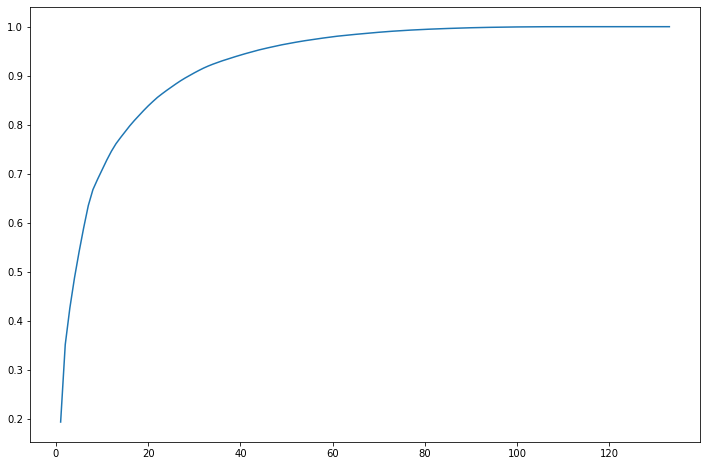

In [102]:
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)

## Looking at the scree plot with 50 PCs we have more than 95% of variance explained.

In [103]:
pca_final = IncrementalPCA(n_components=50)

In [104]:
df_train_pca = pca_final.fit_transform(X_resampled)

In [105]:
df_train_pca.shape

(27020, 50)

In [106]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [107]:
corrmat.shape

(50, 50)

In [108]:
corrmat

array([[ 1.00000000e+00, -2.91193035e-07, -8.35389892e-08, ...,
         2.91554914e-05,  2.99931042e-05, -1.84337261e-05],
       [-2.91193035e-07,  1.00000000e+00, -8.12093130e-09, ...,
         1.68719995e-05,  6.95417147e-05, -9.61221124e-06],
       [-8.35389892e-08, -8.12093130e-09,  1.00000000e+00, ...,
         3.83402740e-05,  3.99476377e-06,  1.78494664e-04],
       ...,
       [ 2.91554914e-05,  1.68719995e-05,  3.83402740e-05, ...,
         1.00000000e+00,  9.05721045e-02, -1.89044963e-02],
       [ 2.99931042e-05,  6.95417147e-05,  3.99476377e-06, ...,
         9.05721045e-02,  1.00000000e+00, -3.97962434e-02],
       [-1.84337261e-05, -9.61221124e-06,  1.78494664e-04, ...,
        -1.89044963e-02, -3.97962434e-02,  1.00000000e+00]])

### Applying the transformation on the test set

In [109]:
telecom_test_df_ori.shape

(30000, 133)

In [110]:
df_test_pca = pca_final.transform(telecom_test_df_ori)
df_test_pca.shape

(30000, 50)

## Applying logistic regression on the data on our Principal components

In [111]:
learner_pca = LogisticRegression()

In [112]:
model_pca = learner_pca.fit(df_train_pca, y_resampled)

In [113]:
y_pred_proba = model_pca.predict_proba(df_train_pca)[::,1]

In [114]:
y_pred_proba

array([0.94098727, 0.07202613, 0.08279394, ..., 0.88796669, 0.73935151,
       0.38871255])

In [115]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_proba})

In [116]:
y_pred_train_final['Churn_Prob_2'] = y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

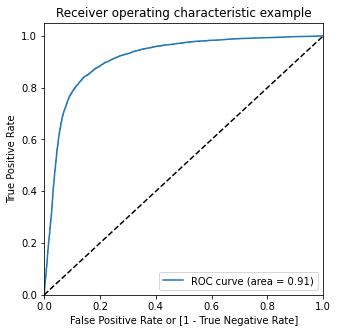

confusion matrix: 
[[11034  2476]
 [ 1708 11802]]
Accuracy:  0.8451517394522576
Precision:  0.8265863566325816
Recall:  0.8735751295336788
F1_score:  0.8494314092413991
AUC score:  0.9128040637716066


{'Logistic_rfe_test': {'Accuracy': 0.8119333333333333,
  'Precision': 0.335582431572247,
  'Recall': 0.8617195161817588,
  'F1 Score': 0.4830492944841488}}

In [117]:
get_accuracy_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_pca_train')

In [118]:
metrics_dict

{'Logistic_rfe_test': {'Accuracy': 0.8119333333333333,
  'Precision': 0.335582431572247,
  'Recall': 0.8617195161817588,
  'F1 Score': 0.4830492944841488}}

### Making predictions on the test set

In [119]:
y_pred_proba = model_pca.predict_proba(df_test_pca)[::,1]

In [120]:
y_pred_proba

array([0.17097494, 0.26557261, 0.69407795, ..., 0.62291673, 0.86107221,
       0.03219955])

In [121]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_proba})

In [122]:
y_pred_test_final['Churn_Prob_2'] = y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

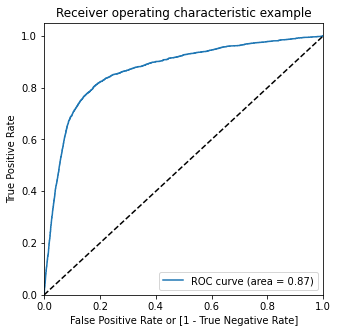

confusion matrix: 
[[18046  8895]
 [  369  2690]]
Accuracy:  0.6912
Precision:  0.2321968062149331
Recall:  0.8793723439032364
F1_score:  0.36738596012018576
AUC score:  0.8691609826900206


In [123]:
metrics_dict = get_accuracy_params(telecom_test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_pca_test')

In [124]:
metrics_dict

{'Logistic_rfe_test': {'Accuracy': 0.8119333333333333,
  'Precision': 0.335582431572247,
  'Recall': 0.8617195161817588,
  'F1 Score': 0.4830492944841488},
 'Logistic_pca_test': {'Accuracy': 0.6912,
  'Precision': 0.2321968062149331,
  'Recall': 0.8793723439032364,
  'F1 Score': 0.36738596012018576}}

### So we could see the Recall coming close to 88% but Accuracy went down close to 69%. This is because Precision has gone down to 23%.
We got a rough idea with PCA and Logistic Regression.
We now move to Lasso and Ridge Regression for further analysis and actual conclusion on right predictors and coefficients.
Let's try other models to see how it performs.

### Model 3. Ridge Regression

In [125]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [127]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.001

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_resampled, y_resampled) 

Ridge(alpha=0.001)

In [128]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.029094,0.009278,0.002761,0.000385,0.0001,{'alpha': 0.0001},-0.319381,-0.323931,-0.319607,-0.310282,...,-0.282553,-0.284203,-0.283607,-0.286608,-0.284964,-0.284927,-0.285272,-0.284412,-0.284165,0.001312
1,0.025505,0.002902,0.002540,0.000415,0.0010,{'alpha': 0.001},-0.319476,-0.324110,-0.319661,-0.310301,...,-0.282565,-0.284220,-0.283616,-0.286624,-0.284994,-0.284959,-0.285304,-0.284448,-0.284185,0.001320
2,0.023381,0.000886,0.002399,0.000224,0.0100,{'alpha': 0.01},-0.320360,-0.325103,-0.320346,-0.310885,...,-0.282618,-0.284308,-0.283659,-0.286811,-0.285322,-0.285295,-0.285610,-0.284776,-0.284359,0.001414
3,0.024032,0.001462,0.002502,0.000267,0.0500,{'alpha': 0.05},-0.323536,-0.328145,-0.323484,-0.313563,...,-0.282793,-0.284510,-0.283862,-0.287686,-0.286818,-0.286759,-0.287090,-0.286283,-0.285130,0.001919
4,0.027087,0.002696,0.002775,0.000477,0.1000,{'alpha': 0.1},-0.326750,-0.331097,-0.326746,-0.316474,...,-0.283425,-0.285167,-0.284528,-0.289146,-0.288948,-0.288882,-0.289231,-0.288450,-0.286456,0.002554


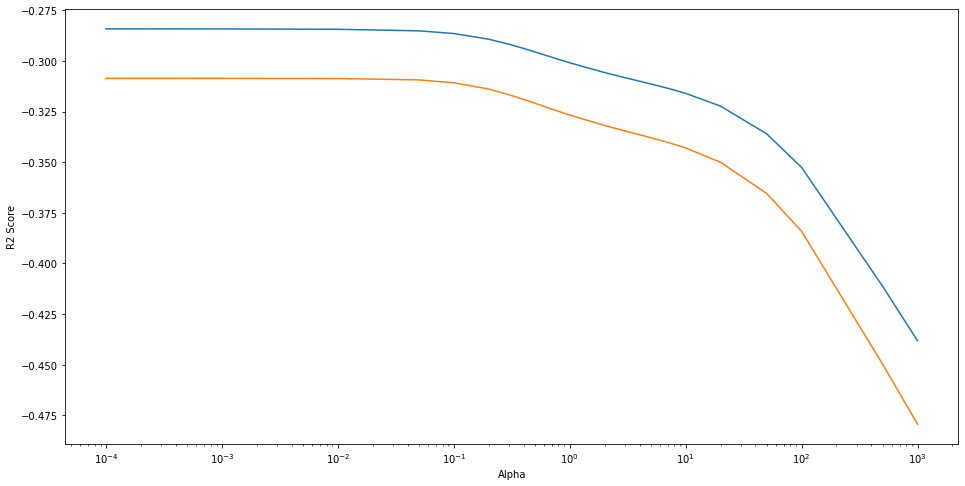

In [129]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

## Looking at the curve, as they are not converging we will go ahead and check Lasso model.

## Model 4. Lasso

In [130]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [132]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_resampled, y_resampled) 

Lasso(alpha=0.0001)

In [133]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.835331,0.160103,0.003733,0.000540,0.0001,{'alpha': 0.0001},-0.341535,-0.344187,-0.341546,-0.331730,...,-0.292739,-0.294463,-0.293746,-0.299694,-0.300283,-0.300205,-0.300574,-0.299869,-0.296705,0.003470
1,0.057071,0.004028,0.003114,0.000308,0.0010,{'alpha': 0.001},-0.377002,-0.380565,-0.374985,-0.367880,...,-0.327975,-0.329771,-0.328502,-0.338257,-0.341858,-0.342025,-0.342180,-0.341615,-0.334757,0.006544
2,0.033536,0.001318,0.002863,0.000287,0.0100,{'alpha': 0.01},-0.521734,-0.520823,-0.523952,-0.520073,...,-0.479788,-0.479434,-0.480125,-0.483507,-0.478888,-0.478857,-0.479268,-0.478949,-0.479749,0.001310
3,0.030231,0.001730,0.002743,0.000281,0.0500,{'alpha': 0.05},-0.538660,-0.538455,-0.539627,-0.538866,...,-0.495597,-0.495682,-0.495643,-0.499784,-0.493827,-0.493827,-0.493827,-0.493827,-0.495345,0.001716
4,0.030755,0.003257,0.002710,0.000253,0.1000,{'alpha': 0.1},-0.538660,-0.538455,-0.539627,-0.538866,...,-0.495597,-0.495682,-0.495643,-0.499784,-0.493827,-0.493827,-0.493827,-0.493827,-0.495345,0.001716


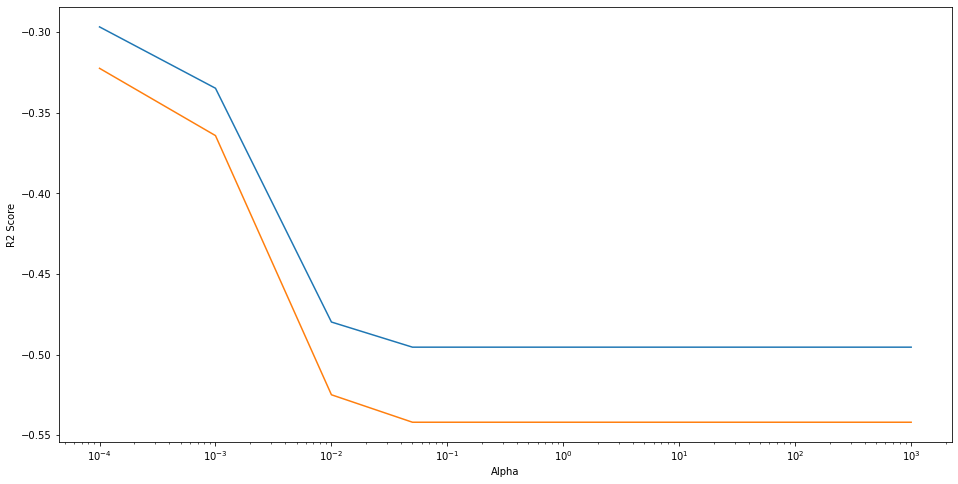

In [134]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

### Looking at the curve, as they are not converging it seems even Lasso model is not working well here.

## Model 5. Tree models - Random Forest

In [135]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [136]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [137]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [138]:
%%time
grid_search.fit(X_resampled, y_resampled)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 19 s, sys: 538 ms, total: 19.5 s
Wall time: 4min 11s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [139]:
grid_search.best_score_

0.9522205773501111

In [140]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

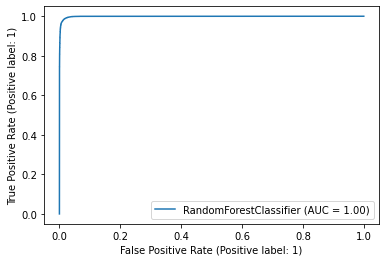

In [141]:
plot_roc_curve(rf_best, X_resampled, y_resampled)
plt.show()

In [142]:
rf_best.feature_importances_

array([2.63175033e-03, 4.02326175e-03, 2.04397787e-02, 4.23598338e-03,
       4.39347934e-03, 8.01575404e-03, 2.32320304e-03, 3.26528740e-03,
       5.33360342e-03, 1.80171516e-03, 5.83221515e-03, 4.90951970e-02,
       2.24446022e-03, 7.57307184e-03, 4.94738094e-02, 2.70705402e-03,
       2.95874741e-03, 7.47429105e-03, 2.34827677e-03, 2.95096351e-03,
       1.42901082e-02, 1.42694701e-03, 2.04258083e-03, 1.44586756e-03,
       9.67870878e-04, 1.67288830e-03, 1.53322671e-03, 2.61594174e-03,
       5.68472955e-03, 3.42436120e-02, 4.48757917e-03, 6.20121607e-03,
       4.33933181e-03, 4.81308236e-03, 4.03679236e-03, 9.72722115e-03,
       8.33438294e-04, 4.31931406e-04, 6.34938425e-04, 5.85594537e-03,
       6.19603345e-03, 6.65330281e-03, 8.24159030e-04, 9.65039377e-04,
       9.15594121e-04, 2.79570099e-03, 4.51340265e-03, 2.63933806e-03,
       1.65379902e-03, 2.07366131e-05, 5.73246438e-05, 3.01988565e-03,
       3.94605156e-03, 2.26119244e-02, 2.72199257e-03, 3.00718075e-03,
      

In [143]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [144]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

,Varname,Imp
80,total_ic_mou_8,0.088657
14,roam_og_mou_8,0.049474
11,roam_ic_mou_8,0.049095
104,total_rech_data_8,0.049089
59,loc_ic_t2m_mou_8,0.048521
65,loc_ic_mou_8,0.040730
95,total_rech_amt_8,0.039401
101,last_day_rch_amt_8,0.039392
107,max_rech_data_8,0.038413
29,loc_og_mou_8,0.034244


### Let's apply Random Forest on test data

In [145]:
y_pred_rf = rf_best.predict(telecom_test_df_ori)

In [146]:
telecom_test_sol_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [147]:
confusion = metrics.confusion_matrix(telecom_test_sol_df.churn_probability, y_pred_rf)

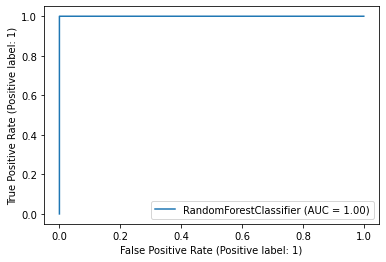

In [148]:
plot_roc_curve(rf_best, telecom_test_df_ori, y_pred_rf)

In [149]:
print('confusion matrix: ')
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TN+TP)/(TN+TP+FN+FP)
print('Accuracy: ', accuracy)
precision = TP / (TP+FP)
print('Precision: ', precision)
recall = TP / (TP+FN)
print('Recall: ', recall)
f1_score = 2*precision*recall/(precision+recall)
print('F1_score: ', f1_score)

confusion matrix: 
[[25135  1806]
 [  782  2277]]
Accuracy:  0.9137333333333333
Precision:  0.5576781778104335
Recall:  0.7443609022556391
F1_score:  0.6376365163819658


In [150]:
metrics_dict['RandomForest_test'] = {
                           'Accuracy': accuracy, 
                           'Precision':precision, 
                           'Recall': recall, 
                           'F1 Score': f1_score, 
                          }

In [151]:
metrics_dict

{'Logistic_rfe_test': {'Accuracy': 0.8119333333333333,
  'Precision': 0.335582431572247,
  'Recall': 0.8617195161817588,
  'F1 Score': 0.4830492944841488},
 'Logistic_pca_test': {'Accuracy': 0.6912,
  'Precision': 0.2321968062149331,
  'Recall': 0.8793723439032364,
  'F1 Score': 0.36738596012018576},
 'RandomForest_test': {'Accuracy': 0.9137333333333333,
  'Precision': 0.5576781778104335,
  'Recall': 0.7443609022556391,
  'F1 Score': 0.6376365163819658}}

## Lets check XGBoost model as well

In [152]:
xgb_cfl = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic')

In [153]:
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [154]:
# Fit the model to our train and target
xgb_cfl.fit(X_resampled, y_resampled)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(telecom_test_df_ori)

In [182]:
xgb_predictions # this the value for Kaggle

array([0, 0, 1, ..., 0, 0, 0])

In [155]:
xgb_predictions_prob = xgb_cfl.predict_proba(telecom_test_df_ori)
xgb_predictions_prob

array([[0.9964586 , 0.00354138],
       [0.9965225 , 0.00347751],
       [0.6521503 , 0.34784973],
       ...,
       [0.98667556, 0.01332443],
       [0.9499757 , 0.05002425],
       [0.99456793, 0.00543207]], dtype=float32)

In [156]:
xgb_predictions_prob.shape

(30000, 2)

In [157]:
xgb_predictions_prob.reshape(-1, )

array([0.9964586 , 0.00354138, 0.9965225 , ..., 0.05002425, 0.99456793,
       0.00543207], dtype=float32)

In [158]:
len(xgb_predictions)

30000

In [159]:
accuracy_score(telecom_test_sol_df.churn_probability, xgb_predictions)

0.9326666666666666

### we see 93.26% accuracy score with default values of XGBoost.

In [160]:
confusion = metrics.confusion_matrix(telecom_test_sol_df.churn_probability, xgb_predictions)

In [161]:
print('confusion matrix: ')
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TN+TP)/(TN+TP+FN+FP)
print('Accuracy: ', accuracy)
precision = TP / (TP+FP)
print('Precision: ', precision)
recall = TP / (TP+FN)
print('Recall: ', recall)
f1_score = 2*precision*recall/(precision+recall)
print('F1_score: ', f1_score)

confusion matrix: 
[[26040   901]
 [ 1119  1940]]
Accuracy:  0.9326666666666666
Precision:  0.6828581485392468
Recall:  0.6341941811049363
F1_score:  0.6576271186440679


### HPT - Random Search for XGBoost

In [162]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10]
        }

folds = 5
param_comb = 10
random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=folds, verbose=3, random_state=42)

In [163]:
random_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=750, subsample=0.8;, score=0.980 total time=18.9min
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.949 total time= 1.9min
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=750, subsample=0.8;, score=0.981 total time=18.9min
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.958 total time= 1.9min
[CV 5/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=750, subsample=0.8;, score=0.983 total time=19.0min
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsa

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

In [164]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 Best accuracy for 5-fold search with 10 parameter combinations:
0.9623982235381199

 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1.0}


In [165]:
# Get our predictions
xgb_predictions = random_search.predict(telecom_test_df_ori)

In [176]:
xgb_cfl.feature_importances_

array([0.00220766, 0.00410148, 0.00262001, 0.00186586, 0.0044044 ,
       0.00612055, 0.0018012 , 0.00173628, 0.00257267, 0.00442289,
       0.00334501, 0.01695367, 0.00701632, 0.00855192, 0.07223155,
       0.00378822, 0.00218879, 0.00595031, 0.00178333, 0.00175488,
       0.0044186 , 0.00180771, 0.0028032 , 0.00453647, 0.00289235,
       0.00497128, 0.00284835, 0.00148039, 0.00211889, 0.00494812,
       0.00403132, 0.00428444, 0.00254736, 0.00252392, 0.00505378,
       0.03109365, 0.00237628, 0.00495705, 0.003997  , 0.00230191,
       0.00792306, 0.00350832, 0.0062364 , 0.00407462, 0.00997682,
       0.00436903, 0.00786756, 0.00322456, 0.006385  , 0.        ,
       0.00408892, 0.00283077, 0.00208943, 0.01532251, 0.00226766,
       0.00362973, 0.00269362, 0.00141068, 0.00186222, 0.00201475,
       0.00636779, 0.00186676, 0.01237054, 0.0042385 , 0.00493973,
       0.00416887, 0.00453378, 0.00601589, 0.00173229, 0.00599949,
       0.01208422, 0.00510818, 0.00688577, 0.00187078, 0.00652

[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.945 total time=  58.7s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.942 total time=  56.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.948 total time=  57.5s
[CV 2/5] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.25, max_depth=10, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.979 total time= 4.1min
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.975 total time= 5.3min
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5, n_estimators=750, subsample=0.8;, score=0.851 total time= 7.6min
[CV 3/5] END cols

In [177]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.985 total time= 5.0min
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.971 total time= 5.1min
[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.6;, score=0.937 total time= 1.5min
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.978 total time= 7.0min
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.893 total time= 1.9min
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=750, subsample=0.8;, score=0.983 total time= 5.8min
[CV 2/5] END cols

In [179]:
imp_df.sort_values(by="Imp", ascending=False).head(15)

,Varname,Imp
80,total_ic_mou_8,0.088657
14,roam_og_mou_8,0.049474
11,roam_ic_mou_8,0.049095
104,total_rech_data_8,0.049089
59,loc_ic_t2m_mou_8,0.048521
65,loc_ic_mou_8,0.040730
95,total_rech_amt_8,0.039401
101,last_day_rch_amt_8,0.039392
107,max_rech_data_8,0.038413
29,loc_og_mou_8,0.034244


[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.979 total time= 5.0min
[CV 4/5] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.25, max_depth=10, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.984 total time= 4.0min
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.6;, score=0.942 total time= 1.5min
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.886 total time= 6.8min
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5, n_estimators=750, subsample=0.8;, score=0.985 total time= 9.5min
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.885 total time=  59.4s
[CV 4/5] END col

In [166]:
xgb_predictions_prob = random_search.predict_proba(telecom_test_df_ori)
xgb_predictions_prob

array([[0.99843574, 0.00156429],
       [0.99668586, 0.00331413],
       [0.14033014, 0.85966986],
       ...,
       [0.91672385, 0.08327617],
       [0.96475315, 0.03524682],
       [0.9887054 , 0.01129462]], dtype=float32)

In [167]:
xgb_predictions_prob.shape

(30000, 2)

In [168]:
accuracy_score(telecom_test_sol_df.churn_probability, xgb_predictions)

0.9335333333333333

In [169]:
confusion = metrics.confusion_matrix(telecom_test_sol_df.churn_probability, xgb_predictions)

In [170]:
print('confusion matrix: ')
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TN+TP)/(TN+TP+FN+FP)
print('Accuracy: ', accuracy)
precision = TP / (TP+FP)
print('Precision: ', precision)
recall = TP / (TP+FN)
print('Recall: ', recall)
f1_score = 2*precision*recall/(precision+recall)
print('F1_score: ', f1_score)

confusion matrix: 
[[25991   950]
 [ 1044  2015]]
Accuracy:  0.9335333333333333
Precision:  0.6795952782462057
Recall:  0.6587119973847663
F1_score:  0.6689907038512616


In [171]:
metrics_dict['XGBoost_test'] = {
                           'Accuracy': accuracy, 
                           'Precision':precision, 
                           'Recall': recall, 
                           'F1 Score': f1_score, 
                          }

### We can see both accuracy and recall are better for XGBoost model without any hyper paramter tuning.

### Let's see the metrics_dict now to tell which model is performing best on the given test dataset.

In [172]:
metrics_dict

{'Logistic_rfe_test': {'Accuracy': 0.8119333333333333,
  'Precision': 0.335582431572247,
  'Recall': 0.8617195161817588,
  'F1 Score': 0.4830492944841488},
 'Logistic_pca_test': {'Accuracy': 0.6912,
  'Precision': 0.2321968062149331,
  'Recall': 0.8793723439032364,
  'F1 Score': 0.36738596012018576},
 'RandomForest_test': {'Accuracy': 0.9137333333333333,
  'Precision': 0.5576781778104335,
  'Recall': 0.7443609022556391,
  'F1 Score': 0.6376365163819658},
 'XGBoost_test': {'Accuracy': 0.9335333333333333,
  'Precision': 0.6795952782462057,
  'Recall': 0.6587119973847663,
  'F1 Score': 0.6689907038512616}}

## Looking at all the models we think Logistic Regression with RFE is best here as it gives better Acccuracy and Recall.

## Top 15 features for Logistic Regression with RFE is

In [173]:
top_feature_lg_rfe

['std_ic_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'arpu_8',
 'std_og_mou_8',
 'std_og_t2m_mou_8',
 'roam_og_mou_8',
 'loc_ic_mou_7',
 'total_og_mou_7',
 'std_og_mou_7',
 'max_rech_amt_8',
 'roam_og_mou_7',
 'arpu_7',
 'max_rech_data_6',
 'arpu_6',
 'total_ic_mou_8',
 'std_ic_t2t_mou_6',
 'total_rech_num_7',
 'total_rech_data_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_mou_6']

[CV 1/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.827 total time= 4.4min
[CV 3/5] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.25, max_depth=10, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.979 total time= 3.9min
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.972 total time= 5.2min
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5, n_estimators=750, subsample=0.8;, score=0.979 total time=10.6min
